# Лабораторная работа №4: Классификация. Деревья решений

6132 Макарова Мария Константиновна Датасет: https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [10]:
data = pd.read_csv('cancer_data.csv')

2. Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Разбить выборку на обучающую и тестовую.
     > Далее используем обучающую выборку, в том числе для метрик.

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
data = data.drop('Unnamed: 32',axis=1) #удаляем неполезный столбец
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
description_list = [
    "Уникальный идентификатор пациента",
    "Диагноз опухоли: M — злокачественная, B — доброкачественная",
    "Среднее значение радиуса ядра опухоли",
    "Среднее значение текстурности (изменчивость интенсивности) опухоли",
    "Среднее значение периметра ядра опухоли",
    "Среднее значение площади ядра опухоли",
    "Среднее значение гладкости (однородности) границ",
    "Среднее значение компактности (сравнение периметра и площади)",
    "Среднее значение вогнутости (глубина вогнутых частей контура)",
    "Среднее значение количества вогнутых точек на контуре",
    "Среднее значение симметрии образования",
    "Среднее значение фрактальной размерности (показатель сложности границы)",
    "Стандартное отклонение радиуса",
    "Стандартное отклонение текстурности",
    "Стандартное отклонение периметра",
    "Стандартное отклонение площади",
    "Стандартное отклонение гладкости",
    "Стандартное отклонение компактности",
    "Стандартное отклонение вогнутости",
    "Стандартное отклонение количества вогнутых точек",
    "Стандартное отклонение симметрии",
    "Стандартное отклонение фрактальной размерности",
    "Наибольшее значение радиуса",
    "Наибольшее значение текстурности",
    "Наибольшее значение периметра",
    "Наибольшее значение площади",
    "Наибольшее значение гладкости",
    "Наибольшее значение компактности",
    "Наибольшее значение вогнутости",
    "Наибольшее значение количества вогнутых точек",
    "Наибольшее значение симметрии",
    "Наибольшее значение фрактальной размерности"
]
dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
id,int64,Уникальный идентификатор пациента
diagnosis,object,"Диагноз опухоли: M — злокачественная, B — доброкачественная"
radius_mean,float64,Среднее значение радиуса ядра опухоли
texture_mean,float64,Среднее значение текстурности (изменчивость интенсивности) опухоли
perimeter_mean,float64,Среднее значение периметра ядра опухоли
area_mean,float64,Среднее значение площади ядра опухоли
smoothness_mean,float64,Среднее значение гладкости (однородности) границ
compactness_mean,float64,Среднее значение компактности (сравнение периметра и площади)
concavity_mean,float64,Среднее значение вогнутости (глубина вогнутых частей контура)
concave points_mean,float64,Среднее значение количества вогнутых точек на контуре


In [15]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}) #заменяем категориальные признаки

In [16]:
X = data.drop(columns = ['diagnosis', 'id'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов {np.bincount(y_train)}")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 30 признаков
Число разных классов [169 286]
Тестовая выборка имеет 114 экземпляров и 30 признаков
Число разных классов [43 71]


3. Дерево решений:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)
   - Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier` ($accuracy$, $precision$, $recall$, $\textit{f-measure}$).
   - Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию.
   - Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.

In [17]:
params = {
    'max_depth': [3, 5, 7, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Лучшие параметры дерева:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion, display_labels=[0, 1])

Лучшие параметры дерева: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2}
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
importances = best_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values(by='importance', ascending=False)

print("Важность признаков:")
print(importance_df)

Важность признаков:
                    feature  importance
20             radius_worst    0.672449
5          compactness_mean    0.064925
27     concave points_worst    0.064137
1              texture_mean    0.040487
21            texture_worst    0.029586
6            concavity_mean    0.019093
24         smoothness_worst    0.018940
28           symmetry_worst    0.016317
16             concavity_se    0.014120
11               texture_se    0.013973
12             perimeter_se    0.009950
22          perimeter_worst    0.009536
25        compactness_worst    0.009424
18              symmetry_se    0.008887
29  fractal_dimension_worst    0.008069
8             symmetry_mean    0.000106
7       concave points_mean    0.000000
9    fractal_dimension_mean    0.000000
0               radius_mean    0.000000
2            perimeter_mean    0.000000
3                 area_mean    0.000000
4           smoothness_mean    0.000000
13                  area_se    0.000000
10                ra

In [19]:
threshold = 0.0
important_features = importance_df[importance_df['importance'] >= threshold]['feature'].tolist()

X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

In [20]:
grid_filtered = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid_filtered.fit(X_train_filtered, y_train)

best_model_filtered = grid_filtered.best_estimator_

y_pred_filtered = best_model_filtered.predict(X_test_filtered)

print("Лучшие параметры дерева:", grid_filtered.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_filtered))
print("Precision:", precision_score(y_test, y_pred_filtered))
print("Recall:", recall_score(y_test, y_pred_filtered))
print("F1 Score:", f1_score(y_test, y_pred_filtered))
print(classification_report(y_test, y_pred_filtered))

confusion_filtered = confusion_matrix(y_test, y_pred_filtered)
disp_filtered = ConfusionMatrixDisplay(confusion_filtered, display_labels=[0, 1])

Лучшие параметры дерева: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2}
Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

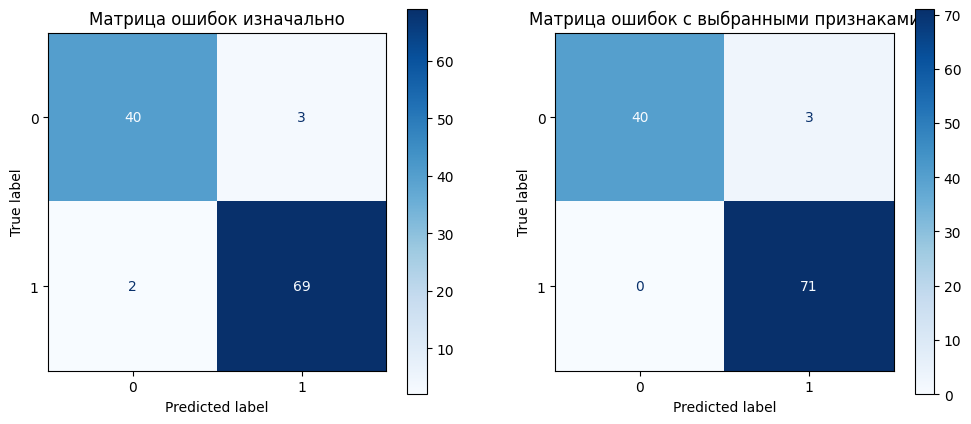

In [21]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

###Выводы:

**Общая точность и метрики выше при фильтрации признаков. Модель стала проще (max_depth стало 3, а было 10). Также отдельно хотелось бы отметить повышение precision для класса 0 до 1.00, также recall для класса 1 стал 1.00. Таким образом, фильтрация признаков улучшила качество классификации и снизила сложность модели.**

4. Случайный лес
   - Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.

In [26]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None],
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

rf_best_model = rf_grid.best_estimator_
y_rf_pred = rf_best_model.predict(X_test)

print("Лучшие параметры случайного леса:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1 Score:", f1_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

rf_confusion = confusion_matrix(y_test, y_rf_pred)
rf_disp = ConfusionMatrixDisplay(rf_confusion, display_labels=[0, 1])

Лучшие параметры случайного леса: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [27]:
rf_importances = rf_best_model.feature_importances_
rf_importance_df = pd.DataFrame({'feature': X.columns, 'importance': rf_importances}).sort_values(by='importance', ascending=False)

print("Важность признаков случайного леса:")
print(rf_importance_df)

rf_threshold = 0.009
rf_important_features = rf_importance_df[rf_importance_df['importance'] >= rf_threshold]['feature'].tolist()

X_train_rf_filtered = X_train[rf_important_features]
X_test_rf_filtered = X_test[rf_important_features]

Важность признаков случайного леса:
                    feature  importance
23               area_worst    0.154737
27     concave points_worst    0.153030
7       concave points_mean    0.105276
20             radius_worst    0.075895
22          perimeter_worst    0.069279
6            concavity_mean    0.068214
2            perimeter_mean    0.057780
0               radius_mean    0.052071
3                 area_mean    0.048886
26          concavity_worst    0.030570
10                radius_se    0.022150
13                  area_se    0.020974
25        compactness_worst    0.019071
21            texture_worst    0.018127
5          compactness_mean    0.013331
1              texture_mean    0.013149
24         smoothness_worst    0.010391
12             perimeter_se    0.009725
28           symmetry_worst    0.007947
16             concavity_se    0.006454
29  fractal_dimension_worst    0.005827
4           smoothness_mean    0.005733
19     fractal_dimension_se    0.004493
11  

In [29]:
rf_grid_filtered = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid_filtered.fit(X_train_rf_filtered, y_train)

rf_best_model_filtered = rf_grid_filtered.best_estimator_
y_rf_pred_filtered = rf_best_model_filtered.predict(X_test_rf_filtered)

print("Лучшие параметры случайного леса:", rf_grid_filtered.best_params_)
print("Accuracy:", accuracy_score(y_test, y_rf_pred_filtered))
print("Precision:", precision_score(y_test, y_rf_pred_filtered))
print("Recall:", recall_score(y_test, y_rf_pred_filtered))
print("F1 Score:", f1_score(y_test, y_rf_pred_filtered))
print(classification_report(y_test, y_rf_pred_filtered))

rf_confusion_filtered = confusion_matrix(y_test, y_rf_pred_filtered)
rf_disp_filtered = ConfusionMatrixDisplay(rf_confusion_filtered, display_labels=[0, 1])

Лучшие параметры случайного леса: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

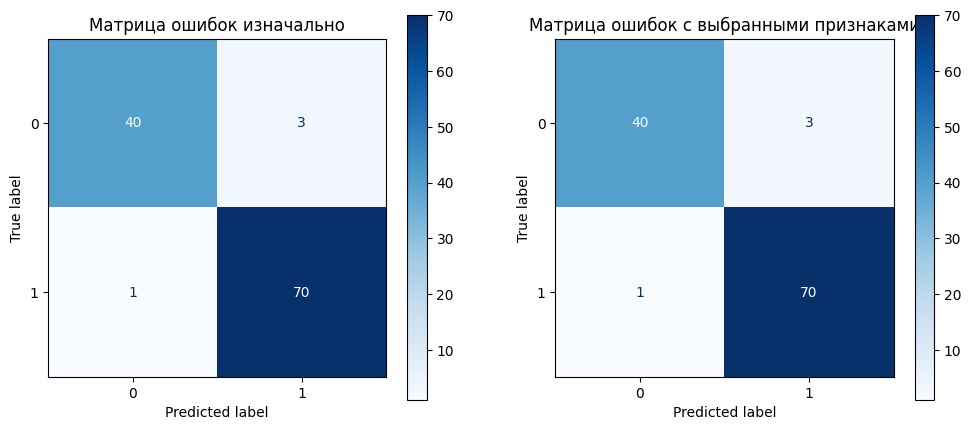

In [30]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
rf_disp.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

rf_disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

###Выводы

**Метрики у моделей идентичны, никаких улучшений или ухудшений не наблюдается. Качество по классам тоже совпадает. (Но если повышать порог для фильтрации признаков, то будут наблюдаться ухудшения)**

5. Метод ближайших соседей:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`).
   - Вывести значения гиперпараметра и метрик для наилучшей модели.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков.

In [31]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

knn_best_model = knn_grid.best_estimator_
y_knn_pred = knn_best_model.predict(X_test)

print("Лучшие параметры KNN:", knn_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_knn_pred))
print("Precision:", precision_score(y_test, y_knn_pred))
print("Recall:", recall_score(y_test, y_knn_pred))
print("F1 Score:", f1_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

knn_confusion = confusion_matrix(y_test, y_knn_pred)
knn_disp = ConfusionMatrixDisplay(knn_confusion, display_labels=[0, 1])

Лучшие параметры KNN: {'metric': 'manhattan', 'n_neighbors': 5}
Accuracy: 0.9473684210526315
Precision: 0.9333333333333333
Recall: 0.9859154929577465
F1 Score: 0.958904109589041
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [32]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

scores = selector.scores_
knn_importance_df = pd.DataFrame({'feature': X.columns, 'score': scores})
knn_importance_df = knn_importance_df.sort_values(by='score', ascending=False)

print("Важность признаков по F-статистике:")
print(knn_importance_df)

knn_threshold = 500
knn_selected_features = knn_importance_df[knn_importance_df['score'] >= knn_threshold]['feature'].tolist()

X_train_knn_filtered = X_train[knn_selected_features]
X_test_knn_filtered = X_test[knn_selected_features]

Важность признаков по F-статистике:
                    feature       score
27     concave points_worst  746.492117
7       concave points_mean  695.179785
22          perimeter_worst  681.263759
20             radius_worst  645.350668
2            perimeter_mean  522.489267
23               area_worst  495.787667
0               radius_mean  482.233945
3                 area_mean  423.654133
6            concavity_mean  396.662370
26          concavity_worst  331.330906
5          compactness_mean  242.589647
25        compactness_worst  240.492785
10                radius_se  186.591816
12             perimeter_se  176.223231
13                  area_se  165.307401
21            texture_worst  126.681903
28           symmetry_worst  108.953927
24         smoothness_worst  102.973429
1              texture_mean   94.917788
17        concave points_se   76.565923
4           smoothness_mean   74.190147
8             symmetry_mean   62.469542
29  fractal_dimension_worst   49.197922
15  

In [33]:
knn_grid_filtered = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid_filtered.fit(X_train_knn_filtered, y_train)

knn_best_model_filtered = knn_grid_filtered.best_estimator_
y_knn_pred_filtered = knn_best_model_filtered.predict(X_test_knn_filtered)

print("Лучшие параметры KNN:", knn_grid_filtered.best_params_)
print("Accuracy:", accuracy_score(y_test, y_knn_pred_filtered))
print("Precision:", precision_score(y_test, y_knn_pred_filtered))
print("Recall:", recall_score(y_test, y_knn_pred_filtered))
print("F1 Score:", f1_score(y_test, y_knn_pred_filtered))
print(classification_report(y_test, y_knn_pred_filtered))

knn_confusion_filtered = confusion_matrix(y_test, y_knn_pred_filtered)
knn_disp_filtered = ConfusionMatrixDisplay(knn_confusion_filtered, display_labels=[0, 1])

Лучшие параметры KNN: {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy: 0.9649122807017544
Precision: 0.9466666666666667
Recall: 1.0
F1 Score: 0.9726027397260274
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

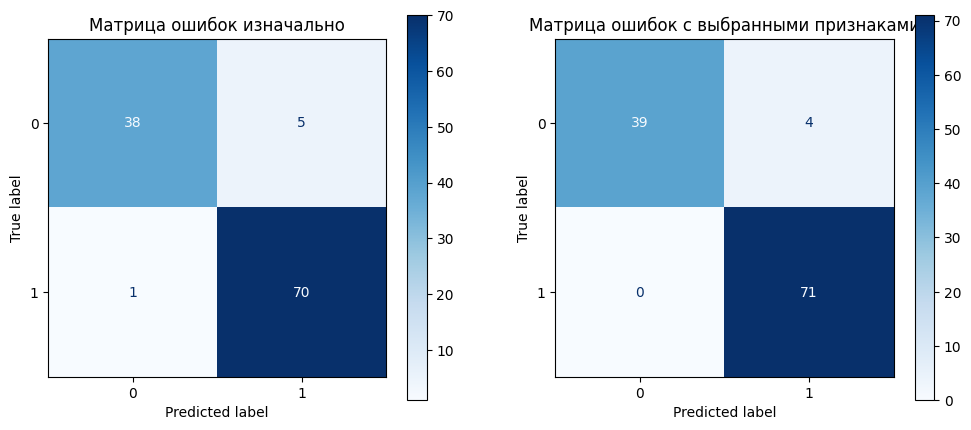

In [34]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
knn_disp.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

knn_disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

###Выводы:

**Как можно заметить, все метрики демонстрируют значительные улучшения, а также в этом случае после фильтрации осталось наименьшее количество признаков по сравнению с предыдущими моделями.**

6. Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств &ndash; не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе &ndash; пропустить этот пункт.
7. Оценка качества построенных моделей:
   - Визуализировать любое полученное дерево решений.
     > Для вывода названий признаков в граф необходимо задать значение аргумента `feature_names` в `sklearn.tree.export_graphviz`, для вывода названий классов &ndash; `class_names` (перед кодированием целевого признака можно сохранить названия в отдельный массив).
   - Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на **тестовой выборке**. Привести значения метрик $accuracy$, $precision$, $recall$, $\textit{f-measure}$.

In [46]:
knn_filtered_features = set(X_train_knn_filtered.columns)
rf_filtered_features = set(X_train_rf_filtered.columns)
tree_filtered_features = set(X_train_filtered.columns)
combined_features = list(knn_filtered_features | tree_filtered_features | rf_filtered_features) #объединение
print(combined_features)

X_train_combined = X_train[combined_features]
X_test_combined = X_test[combined_features]

['area_worst', 'texture_se', 'radius_mean', 'symmetry_mean', 'concave points_mean', 'concavity_mean', 'area_se', 'smoothness_mean', 'area_mean', 'concavity_se', 'concave points_worst', 'radius_se', 'radius_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'compactness_mean', 'perimeter_mean', 'symmetry_worst', 'smoothness_worst', 'symmetry_se', 'compactness_se', 'concave points_se', 'compactness_worst', 'perimeter_se', 'texture_mean', 'texture_worst', 'concavity_worst', 'perimeter_worst', 'smoothness_se', 'fractal_dimension_se']


In [47]:
best_tree_params = grid_filtered.best_params_
best_model_combined = DecisionTreeClassifier(random_state=42, **best_tree_params)
best_model_combined.fit(X_train_combined, y_train)

y_pred_combined = best_model_combined.predict(X_test_combined)

print("Accuracy:", accuracy_score(y_test, y_pred_combined))
print("Precision:", precision_score(y_test, y_pred_combined))
print("Recall:", recall_score(y_test, y_pred_combined))
print("F1 Score:", f1_score(y_test, y_pred_combined))
print(classification_report(y_test, y_pred_combined))

confusion_combined = confusion_matrix(y_test, y_pred_combined)
disp_combined = ConfusionMatrixDisplay(confusion_combined, display_labels=[0, 1])

Accuracy: 0.9298245614035088
Precision: 0.92
Recall: 0.971830985915493
F1 Score: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [48]:
best_rf_params = rf_grid_filtered.best_params_
rf_best_model_combined = RandomForestClassifier(random_state=42, **best_rf_params)
rf_best_model_combined.fit(X_train_combined, y_train)

y_rf_pred_combined = rf_best_model_combined.predict(X_test_combined)

print("Accuracy:", accuracy_score(y_test, y_rf_pred_combined))
print("Precision:", precision_score(y_test, y_rf_pred_combined))
print("Recall:", recall_score(y_test, y_rf_pred_combined))
print("F1 Score:", f1_score(y_test, y_rf_pred_combined))
print(classification_report(y_test, y_rf_pred_combined))

rf_confusion_combined = confusion_matrix(y_test, y_rf_pred_combined)
rf_disp_combined = ConfusionMatrixDisplay(rf_confusion_combined, display_labels=[0, 1])

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [49]:
best_knn_params = knn_grid_filtered.best_params_
knn_best_model_combined = KNeighborsClassifier(**best_knn_params)
knn_best_model_combined.fit(X_train_combined, y_train)

y_knn_pred_combined = knn_best_model_combined.predict(X_test_combined)

print("Accuracy:", accuracy_score(y_test, y_knn_pred_combined))
print("Precision:", precision_score(y_test, y_knn_pred_combined))
print("Recall:", recall_score(y_test, y_knn_pred_combined))
print("F1 Score:", f1_score(y_test, y_knn_pred_combined))
print(classification_report(y_test, y_knn_pred_combined))

knn_confusion_combined = confusion_matrix(y_test, y_knn_pred_combined)
knn_disp_combined = ConfusionMatrixDisplay(knn_confusion_combined, display_labels=[0, 1])

Accuracy: 0.9385964912280702
Precision: 0.9210526315789473
Recall: 0.9859154929577465
F1 Score: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



###Выводы:

**Случайный лес - самая сбалансированная и точная модель среди представленных. KNN справился лучше дерева решений, но уступает случайному лесу. Дерево решений справилось хуже остальных моделей.**



Text(0.5, 1.0, 'Матрица ошибок KNeighborsClassifier')

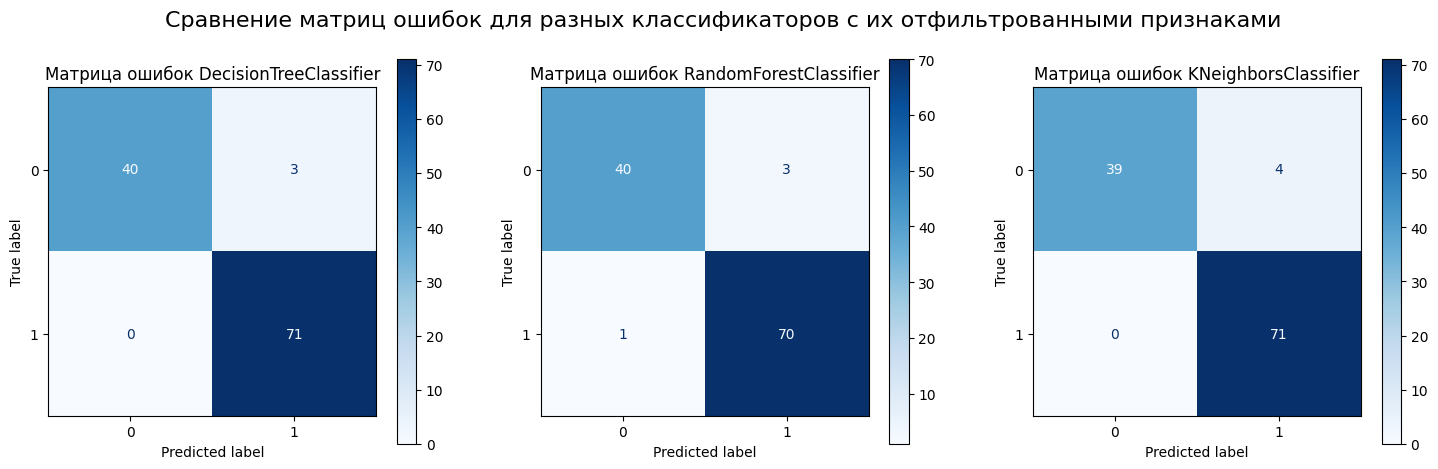

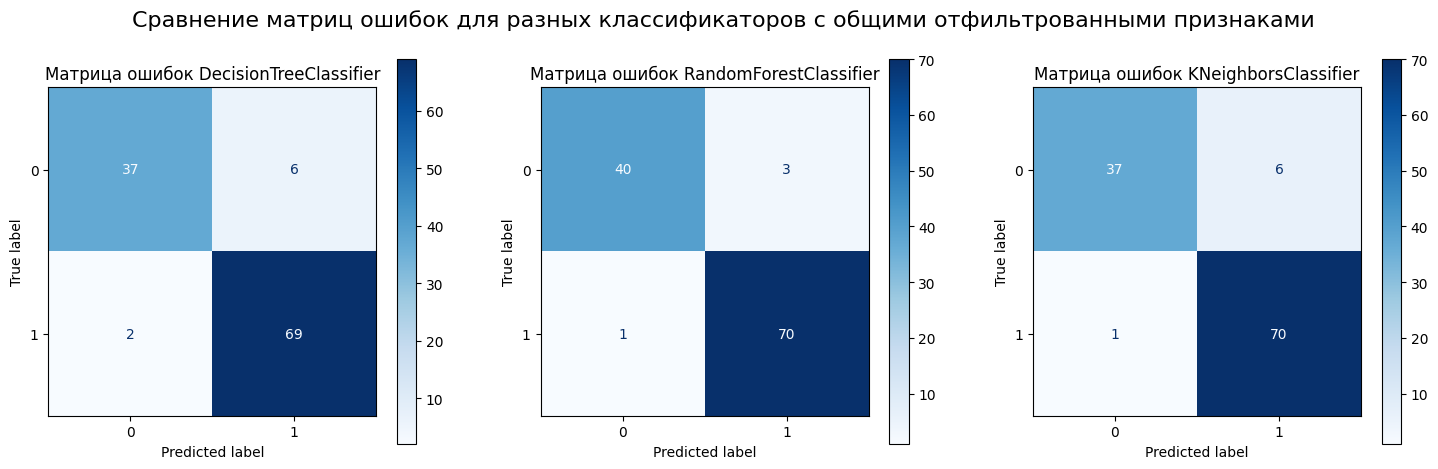

In [50]:
fig_1, axes_1 = plt.subplots(1, 3, figsize=(18, 5))
fig_1.suptitle('Сравнение матриц ошибок для разных классификаторов с их отфильтрованными признаками', fontsize=16)
disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок DecisionTreeClassifier')

rf_disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок RandomForestClassifier')

knn_disp_filtered.plot(cmap=plt.cm.Blues, ax=axes_1[2])
axes_1[2].set_title('Матрица ошибок KNeighborsClassifier')

fig_2, axes_2 = plt.subplots(1, 3, figsize=(18, 5))
fig_2.suptitle('Сравнение матриц ошибок для разных классификаторов с общими отфильтрованными признаками', fontsize=16)
disp_combined.plot(cmap=plt.cm.Blues, ax=axes_2[0])
axes_2[0].set_title('Матрица ошибок DecisionTreeClassifier')

rf_disp_combined.plot(cmap=plt.cm.Blues, ax=axes_2[1])
axes_2[1].set_title('Матрица ошибок RandomForestClassifier')

knn_disp_combined.plot(cmap=plt.cm.Blues, ax=axes_2[2])
axes_2[2].set_title('Матрица ошибок KNeighborsClassifier')

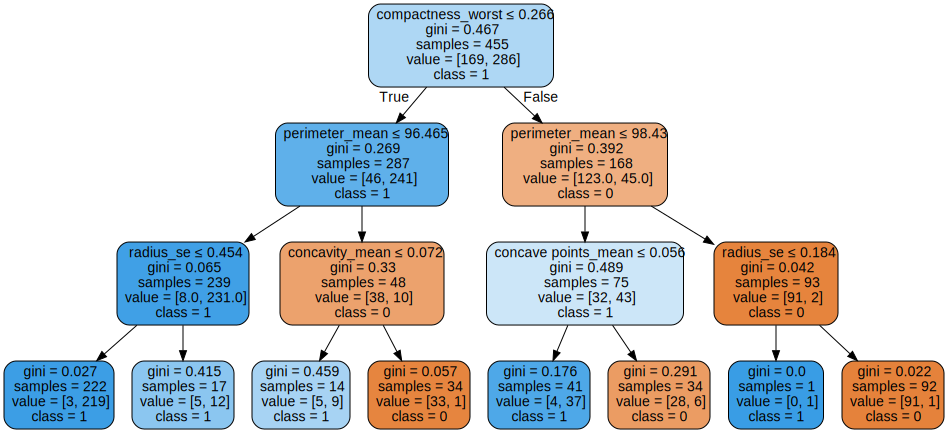

In [40]:
dot_data = export_graphviz(
    best_model_combined,
    out_file=None,
    feature_names=combined_features,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)
tree_graph = graphviz.Source(dot_data)
tree_graph

##Финальный вывод:

Фильтрация признаков для каждой модели в отдельности в целом улучшает значение метрик: для дерева решений благодаря фильтрации метрики повысились и упростилась структура модели; для случайного леса фильтрация признаков не повлияла на качество модели, но при более жёсткой фильтрации начнёт снижаться точность; для KNN фильтрация признаков улучшила метрики, а также значительно уменьшилась размерность данных.  


| Модель             | Accuracy (до / после) | Precision           | Recall              | F1 Score            |
| ------------------ | --------------------- | ------------------- | ------------------- | ------------------- |
| **Дерево решений** | 0.9561 → **0.9737**   | 0.9583 → **0.9595** | 0.9718 → **1.0000** | 0.9650 → **0.9793** |
| **Случайный лес**  | **0.9649**          | **0.9589**        | **0.9859**        | **0.9722**        |
| **KNN**            | 0.9474 → **0.9649**   | 0.9333 → **0.9467** | 0.9859 → **1.0000** | 0.9589 → **0.9726** |  


Если сравнивать каждую модель после фильтрации, то дерево решений справилось лучше всего.

На общем списке выбранных признаков случайный лес показал наивысшую точность и сбалансированность по всем метрикам, KNN по качеству "занимает второе место", дерево решений уступает остальным.  


| Модель             | Accuracy (индивидуал. / общие) | Precision       | Recall          | F1 Score        |
| ------------------ | ----------------------------- | --------------- | --------------- | --------------- |
| **Дерево решений** | **0.9737** → 0.9298           | 0.9595 → 0.9200 | 1.0000 → 0.9718 | 0.9793 → 0.9452 |
| **Случайный лес**  | 0.9649                      | 0.9589        | 0.9859        | 0.9722        |
| **KNN**            | **0.9649** → 0.9386           | 0.9467 → 0.9211 | 1.0000 → 0.9859 | 0.9726 → 0.9524 |


У всех моделе, кроме случайного леса, наблюдается снижение метрик при переходе к общему списку признаков.


